# Perceptron Implementation

## Import Libraries

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

## Create a Perceptron Class

In [56]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

## Prepare a Dataset

Text(0.5, 1.0, 'Dataset for Binary Classifier')

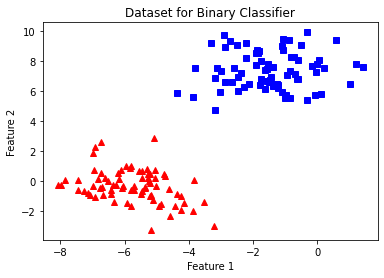

In [57]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=22)
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's take a look
fig = plt.figure()
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title('Dataset for Binary Classifier')

## Training

In [58]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred)/len(y_true)
    return accuracy

# Create perceptron instance
neuron = Perceptron(learning_rate=0.01, n_iters=1000)
neuron.fit(X_train, y_train)
predictions = neuron.predict(X_test)

print(f"Perceptron classification accuracy: {accuracy(y_test,predictions)*100}%")

Perceptron classification accuracy: 100.0%


## Graphical Representation

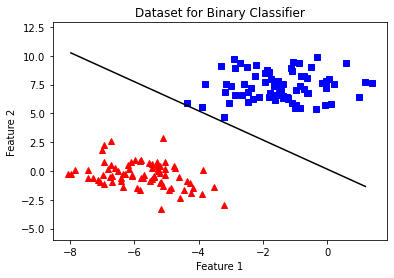

In [59]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-neuron.weights[0] * x0_1 - neuron.bias) / neuron.weights[1]
x1_2 = (-neuron.weights[0] * x0_2 - neuron.bias) / neuron.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.title('Dataset for Binary Classifier')

plt.show()